### 101. 从csv文件中读取指定数据

- pandas.read_csv参数：
    - usecols : array-like, default None
        - 返回一个数据子集，该列表中的值必须可以对应到文件中的位置（数字可以对应到指定的列）或者是字符传为文件中的列名。
    - nrows : int, default None
        - 需要读取的行数（从文件头开始算起）。
    - encoding : str, default None
        - 指定字符集类型，通常指定为'utf-8'
- 相关资料：
    - https://blog.csdn.net/sinat_35562946/article/details/81058221

In [1]:
import pandas as pd
import numpy as np
# 从数据1中的前10行中读取positionName, salary两列
df = pd.read_csv('./data/数据1.csv', encoding='gbk', usecols=['positionName', 'salary'], nrows=10)
df

### 102. 从CSV文件中读取指定数据

- converters : dict, default None
    - 列转换函数的字典。key可以是列名或者列的序号。

In [2]:
# 从数据2中读取数据并在读取数据时将薪资大于10000的为改为高
df = pd.read_csv('./data/数据2.csv', converters={'薪资水平':lambda x : '高' if float(x) > 10000 else '低'})
df

### 103. 从上一题数据中，对薪资水平列每隔20行进行一次抽样

- Python中双冒号的作用[::]:
    - Python序列切片地址可以写为[开始：结束：步长]，其中的开始和结束可以省略;
    - 1. range(n)生成[0,n)区间整数;
    - 2. 开始start省略时，默认从第0项开始;
    - 3. 结尾省略的时候，默认到数组最后;
    - 4. 开始和结尾不省略的时候（[2:6:]）, step省略默认为1;
    - 5. 步长step=n;代表从start开始（start也算）每隔step间隔，取一个数，一直到结尾end; [::3]
    - 6. 当step等于负数的时候，从右向左取数。
        - 例：
            - range(10)[::-1] -- [9,8,7,6,5,4,3,2,1,0]
            - range(10)[::-2] -- [9,7,5,3,1]
- 相关资料：
    - https://blog.csdn.net/u011771047/article/details/52259401

- Pandas中中括号和双中括号:
    - 当我们使用pandas中的groupby进行分组聚合时，若对需要聚合的单列使用双中括号，则输出时会带有列标签；
    - 若对需要聚合的单列使用单中括号，则输出时不会带有列标签，末尾会单独输出一行属性列；
    - 若需要将多列进行聚合时，单中括号和双中括号没有区别；
- 相关资料：
    - https://blog.csdn.net/li578023/article/details/76116581

In [3]:
df.iloc[::20, :][['薪资水平']]

### 104. 将数据取消使用科学计数法

In [4]:
#输入:随机生成10个0-1范围的数，然后对每个数取10次方，列名设置为data
df = pd.DataFrame(np.random.random(10)**10, columns=['data'])
df

#### 设置数字格式，小数位数、百分号、千位分隔符:
- 设置小数位数，四舍五入
    - 法一：使用round()函数
        - df.round(decimals=3)
    - 法二：使用自定义函数 + %.2f
        - df['data'].map(lambda x : ('%.2f')%x)
        - 但是经过自定义函数处理过后的数据已经不再是float。如需后续计算的话需要先做变换;、
    - 法三：
         - df['data'].map(lambda x : format(x, '.2f'))
- 百分数：
    - 自定义函数+格式化处理
        - df['data'].map(lambda x : format(x, '.2%'))
    - 这里利用自定义函数将每个数字进行format格式处理，处理后数据从float格式转换成了带2位小数和百分号的对象;
- 设置千位分隔符:
    - 自定义函数+格式化处理
        - df['data'].map(lambda x : format(x, ','))
        - 处理后依然是对象格式。设置千位分割符请小心操作，因为对电脑来说，这些已经不再是数字了，而是数字和逗号组成的字符串，要再变成数值型就麻烦了。
- 相关资料：
    - https://zhuanlan.zhihu.com/p/30955381

In [5]:
#方法一：
df.round(3)
#方法二：
#df['data'] = df['data'].map(lambda x : ('%.2f') % x)
#方法三：
#df['data'] = df['data'].map(lambda x : format(x, '.2f'))
#df

### 105. 将上一题的数据转换为百分数

In [6]:
#方法一：自定义函数+格式化处理
#df['data'] = df['data'].map(lambda x : format(x, '.2%'))
#df
#方法二：
df.style.format({'data' : '{0:.2%}'.format})

,data
0,0.00%
1,0.00%
2,0.00%
3,0.18%
4,0.80%
5,7.85%
6,0.00%
7,57.73%
8,53.77%
9,0.00%


### 106. 查找上一题数据中第3大值的行号

- argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y
    - numpy.argsort(a, axis=-1, kind=’quicksort’, order=None)
        - 功能: 将矩阵a按照axis排序，并返回排序后的下标
        - 参数: a:输入矩阵， axis:需要排序的维度
        - 返回值: 输出排序后的下标
    - 取数组x的最小值:
        - x[x.argsort()[0]]
        - x[x.argmin()]
    - 取数组x的最大值：
        - x[x.argsort()[-1]]  # -1代表从后往前反向的索引
        - x[x.argmax()]
- 相关资料：
    - np.argsort()的用法: https://www.cnblogs.com/lucas-zhao/p/11697203.html
    - 浅述python中argsort()函数的用法 : https://www.cnblogs.com/yyxf1413/p/6253995.html

In [7]:
#方法一：
#argsort() -- 从小到大排, 输出索引
#[[::-1]]倒序输出 -- 即为从大到小排
df['data'].argsort()[::-1][len(df)-3]

5

In [8]:
#方法二：先进行倒序排序，然后重置索引，取第三行第一列即为第3大值的行号
df['data'].sort_values(ascending=False).reset_index().iloc[2,0]

5

### 107. 反转df的行

In [9]:
#[::-1]表示步长为-1, 从后往前倒序输出
df.iloc[::-1, :]

,data
9,3.131629e-06
8,5.376767e-01
7,5.773330e-01
6,3.202136e-09
5,7.848121e-02
4,8.026160e-03
3,1.803926e-03
2,1.041271e-07
1,3.197806e-05
0,8.977968e-08


### 108. 按照多列对数据进行合并

In [10]:
#输入
df1= pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

df2= pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

- df = pd.merge(left, right, how = "inner",on = "None")：
    - left: 左表。也就是第一个df。
    - right：右表。也就是第二个df。
     - how: 和concat里面的"join"类似，表示“如何合并两表。
         - 1）left: 只使用左表的键。
         - 2）right：只使用右表的键。
         - 3）inner: 使用左右表键的交集。4）outer：使用左右表键的并集。
    - on: 表示按照哪一个键来进行合并。
- 相关资料：https://zhuanlan.zhihu.com/p/113618765

In [11]:
pd.merge(df1, df2, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


### 109. 按照多列对数据进行合并

In [12]:
#左连接
pd.merge(df1, df2, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### 110. 再次读取数据1并显示所有的列

- pd.set_option()参数详解：
    - 显示所有列: 
        - pd.set_option('display.max_columns', None)
        - pd.set_option('display.max_columns', 5) #最多显示5列
    - 显示所有行：
        - pd.set_option('display.max_rows', None)
        - pd.set_option('display.max_rows', 10)#最多显示10行
    - 显示小数位数:
        - pd.set_option('display.float_format',lambda x: '%.2f'%x) #两位
    - 显示宽度:
        - pd.set_option('display.width', 100)
    - 设置小数点后的位数:
        - pd.set_option('precision', 1)
    - 是否换行显示:
        - pd.set_option('expand_frame_repr', False)
        - True就是可以换行显示。设置成False的时候不允许换行
- 相关资料：
    - pd.set_option()参数详解：
        - https://zhuanlan.zhihu.com/p/336909179
        - https://www.cnblogs.com/yesuuu/p/6100714.html

In [13]:
df = pd.read_csv('./data/数据1.csv', encoding='gbk')
pd.set_option('display.max.columns', None)
df

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany
0,6802721,数据分析,475770,i/image2/M01/B7/3E/CgoB5lwPfEaAdn8WAABWQ0Jgl5s...,50-150人,"移动互联网,电商",A轮,"['绩效奖金', '带薪年假', '定期体检', '弹性工作']",产品|需求|项目类,数据分析,数据分析,"['SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']",2020/3/16 11:00,11:00发布,余杭区,['仓前'],37500,1-3年,全职,本科,五险一金、弹性工作、带薪年假、年度体检,today,2020/3/16 11:00,12022406,1,NaN,NaN,NaN,30.278421,120.005922,NaN,50,1,233,0,15.101875,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
1,5204912,数据建模,50735,image1/M00/00/85/CgYXBlTUXeeAR0IjAABbroUk-dw97...,150-500人,电商,B轮,"['年终奖金', '做五休二', '六险一金', '子女福利']",开发|测试|运维类,数据开发,建模,"['算法', '数据架构']","['算法', '数据架构']",[],2020/3/16 11:08,11:08发布,滨江区,"['西兴', '长河']",15000,3-5年,全职,本科,"六险一金,定期体检,丰厚年终",disabled,2020/3/16 11:08,5491688,1,NaN,NaN,NaN,30.188041,120.201179,NaN,23,1,176,0,32.559414,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
2,6877668,数据分析,100125,image2/M00/0C/57/CgqLKVYcOA2ADcFuAAAE8MukIKA74...,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,"['数据库', '数据分析', 'SQL']","['数据库', 'SQL']",[],2020/3/16 10:33,10:33发布,江干区,"['四季青', '钱江新城']",3500,1-3年,全职,本科,五险一金 周末双休 不加班 节日福利,today,2020/3/16 10:33,5322583,1,4号线,江锦路,4号线_城星路;4号线_市民中心;4号线_江锦路,30.241521,120.212539,NaN,11,4,80,0,14.972357,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
3,6496141,数据分析,26564,i/image2/M01/F7/3F/CgoB5lyGAQGAZeI-AAAdOqXecnw...,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,[],['电商'],['电商'],2020/3/16 10:10,10:10发布,江干区,NaN,45000,3-5年,全职,本科,年终奖等,threeDays,2020/3/16 10:10,9814560,1,1号线,文泽路,1号线_文泽路,30.299404,120.350304,NaN,100,1,68,0,12.874153,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True
4,6467417,数据分析,29211,i/image2/M01/77/B8/CgoB5l1WDyGATNP5AAAlY3h88SY...,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['BI', '数据分析', '数据运营']","['BI', '数据运营']",[],2020/3/16 09:56,09:56发布,余杭区,['仓前'],30000,3-5年,全职,大专,五险一金,disabled,2020/3/16 09:56,6392394,1,NaN,NaN,NaN,30.282952,120.009765,NaN,20,1,66,0,12.755375,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,6884346,数据分析师,21236,i/image/M00/43/F6/CgqKkVeEh76AUVPoAAA2Bj747wU6...,500-2000人,"移动互联网,医疗丨健康",C轮,"['技能培训', '年底双薪', '节日礼物', '绩效奖金']",产品|需求|项目类,数据分析,数据分析,"['数据库', '商业', '数据分析', 'SQL']","['医疗健康', '数据库', '商业', '数据分析', 'SQL']","['医疗健康', '数据库', '商业', '数据分析', 'SQL']",2020/3/11 16:45,2020/3/11,萧山区,NaN,25000,3-5年,全职,不限,大牛老板，开放环境，民生行业，龙头公司,threeDays,2020/3/16 09:49,1665167,1,NaN,NaN,NaN,30.203078,120.247069,NaN,96,1,0,0,0.314259,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
101,6849100,商业数据分析,72076,i/image2/M01/92/A4/CgotOV2LPUmAR_8dAAB_DlDMiXA...,500-2000人,"移动互联网,电商",C轮,"['节日礼物', '股票期权', '带薪年假', '年度旅游']",市场|商务类,市场|营销,商业数据分析,"['市场', '数据分析', '行业分析', '市场分析']","['电商', '市场', '数据分析', '行业分析', '市场分析']","['电商', '市场', '数据分析', '行业分析', '市场分析']",2020/3/14 17:38,2天前发布,余杭区,NaN,35000,1-3年,全职,硕士,五险一金、带薪休假,threeDays,2020/3/14 17:38,1732416,1,NaN,NaN,NaN,30.276694,119.990918,NaN,2,3,0,0,0.283276,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
102,6803432,奔驰·耀出行-BI数据分析专家,751158,i/image3/M01/64/93/Cgq2xl48z2mAeYRoAAD6Qf_Jeq8...,150-500人,移动互联网,不需要融资,[],开发|测试|运维类,数据开发,数据分析,"['MySQL', '数据处理', '数据分析']","['MySQL', '数据处理', '数据分析']",[],202

### 111. 查找secondType与thirdType值相等的行号

In [14]:
#方法一：
df[df['secondType'] == df['thirdType']].index
#方法二：
np.where(df.secondType == df.thirdType)

(array([  0,   2,   4,   5,   6,  10,  14,  23,  25,  27,  28,  29,  30,
         33,  37,  38,  39,  40,  41,  48,  49,  52,  53,  55,  57,  61,
         65,  66,  67,  71,  73,  74,  75,  79,  80,  82,  85,  88,  89,
         91,  96, 100], dtype=int64),)

- np.where()用法：
    - 1. np.where(condition, x, y)
        - 满足条件(condition)，输出x，不满足输出y。
    - 2. np.where(condition)
        - 只有条件 (condition)，没有x和y，则输出满足条件 (即非0) 元素的坐标 (等价于numpy.nonzero)。当条件成立时，where返回的是每个符合condition条件元素的坐标,返回的是以元组的形式。
- 相关资料:
    - https://www.cnblogs.com/massquantity/p/8908859.html
    - https://blog.csdn.net/lens___/article/details/83896645

### 112. 查找薪资大于平均薪资的第三个数据

In [15]:
#方法一：
df[df['salary'] > df['salary'].mean()][2:3].index #或iloc[2] #iloc[2, :]

Int64Index([5], dtype='int64')

- np.argwhere()：
    - 返回满足条件的所有索引值，得到一个列表;

In [16]:
#方法二：
np.argwhere(np.array(df['salary'] > df['salary'].mean()))[2]

array([5], dtype=int64)

### 113. 将上一题数据的salary列开根号

In [17]:
#方法一：
import math as mt
pd.DataFrame(df['salary'].map(lambda x : mt.sqrt(x)))

,salary
0,193.649167
1,122.474487
2,59.160798
3,212.132034
4,173.205081
...,...
100,158.113883
101,187.082869
102,173.205081
103,141.421356


- log(x + 1)：np.log1p
- 函数e的x次幂-1：np.expm1
- e的次数幂:np.exp
- 取对数:np.log
- 开根号：np.sqrt
- 平方：np.exp2
- 以2为底的对数：np.log2

In [18]:
#方法二：
df[['salary']].apply(np.sqrt)

,salary
0,193.649167
1,122.474487
2,59.160798
3,212.132034
4,173.205081
...,...
100,158.113883
101,187.082869
102,173.205081
103,141.421356


### 114. 将上一题数据的linestaion列按_拆分

In [19]:
df['split'] = df['linestaion'].str.split('_')
df[['split']]

,split
0,NaN
1,NaN
2,"[4号线, 城星路;4号线, 市民中心;4号线, 江锦路]"
3,"[1号线, 文泽路]"
4,NaN
...,...
100,NaN
101,NaN
102,"[1号线, 滨和路;1号线, 江陵路;1号线, 滨和路;1号线, 江陵路]"
103,NaN


### 115. 查看上一题数据中一共有多少列

In [20]:
#方法一：
len(df.columns)
#方法二：
df.shape[1]

54

## 小作业

### 116. 提取industryField列以'数据'开头的行

- Pandas提取含有指定字符串的行或列:
    - 完全匹配：
        - ==
    - 部分匹配:
        - str.contains()：包含一个特定的字符串
            - 参数na：缺少值NaN处理
            - 参数case：大小写的处理
            - 参数regex：使用正则表达式模式
        - str.endswith()：以特定字符串结尾
        - str.startswith()：以特定的字符串开头
        - str.match()：匹配正则表达式模式
        - 注：要提取部分匹配的行，可以使用pandas的（str.xxx（））方法，根据指定条件提取的字符串方法。
- 相关资料：https://blog.csdn.net/nixiang_888/article/details/109371043

In [21]:
#方法一：match函数
#df[df['industryField'].str.match('数据')]
#方法二：startswith函数
df[df['industryField'].str.startswith('数据')]

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,split
8,6458372,数据分析专家,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,其他数据分析,"['数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']",2020/3/16 10:57,10:57发布,余杭区,NaN,60000,5-10年,全职,本科,六险一金、境内外旅游、带薪年假、培训发展,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,24,0,1.141952,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
10,6804629,数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,数据分析,['数据分析'],"['电商', '广告营销', '数据分析']","['电商', '广告营销', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,不限,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,17,0,1.161869,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
13,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,16,0,1.075559,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
21,6267370,数据分析专家,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w50...,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",开发|测试|运维类,数据开发,数据分析,"['数据挖掘', '数据分析']","['数据挖掘', '数据分析']",[],2020/3/16 11:16,11:16发布,滨江区,NaN,20000,5-10年,全职,本科,五险一金,today,2020/3/16 11:16,466738,1,4号线,中医药大学,4号线_中医药大学;4号线_联庄,30.185480,120.139320,NaN,43,1,7,0,1.290228,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,"[4号线, 中医药大学;4号线, 联庄]"
32,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,37500,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,16,0,1.075712,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
37,6242470,数据分析师,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w50...,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['增长黑客', '数据分析', '商业']","['增长黑客', '数据分析', '商业']",[],2020/3/16 11:16,11:16发布,滨江区,NaN,22500,1-3年,全职,本科,五险一金,today,2020/3/16 11:16,466738,1,4号线,中医药大学,4号线_中医药大学;4号线_联庄,30.185480,120.139320,NaN,43,1,5,0,1.060218,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,"[4号线, 中医药大学;4号线, 联庄]"
50,6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ...,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,数据分析师,"['需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']",2020/3/16 10:49,10:49发布,西湖区,NaN,27500,3-5年,全职,不限,阿里系创业、云计算生态、餐补、双休,today,2020/3/16 10:49,3859261,1,NaN,NaN,NaN,30.289482,120.067080,NaN,1,1,5,0,0.947202,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
63,6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ...,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,数据分析师,"['需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']",2020/3/16 10:49,10:49发布,西湖区,NaN,27500,3-5年,全职,不限,阿里系创业、云计算生态、餐补、双休,today,2020/3/16 10:49,3859261,1,NaN,NaN,NaN,30.289482,120.067080,NaN,1,1,4,0,0.856464,NaN,NaN,NaN,0,0

### 117. 按列制作数据透视表

- pivot_table(data, values=None, index=None, columns=None,aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    - 最重要的四个参数index、values、columns、aggfunc
- 相关资料：
    - https://www.cnblogs.com/Yanjy-OnlyOne/p/11195621.html

In [22]:
#以positionId为索引，生成两列（salary，score）的数据透视表
df_picotTable = pd.pivot_table(df, values=['salary', 'score'], index='positionId')
df_picotTable

,salary,score
positionId,,
5203054,30000,4.0
5204912,15000,176.0
5269002,37500,1.0
5453691,30000,4.0
5519962,37500,14.0
...,...,...
6882983,27500,15.0
6884346,25000,0.0
6886661,37500,5.0


### 118. 同时对salary、score两列进行计算

- agg()函数：
    - 聚合函数，对分组后数据进行聚合，默认情况对分组后其他列进行聚合。
    - DataFrame.agg（func，axis = 0，* args，** kwargs ）
        - ![Image Name](https://cdn.kesci.com/upload/image/qq1tb6hxoj.png?imageView2/0/w/960/h/960)

- 例：
    - 1.使用agg求出当前数据对应的统计量
        - df[['salary', 'score']].agg([np.sum])
    - 2.使用agg分别求字段的不同统计量
        - df.agg({'salary' : np.sum, 'score' : np.mean})
    - 3.使用agg方法求不同字段的不同数目统计量
        - df.agg({'salary' : np.sum, 'score' : [np.sum, np.mean]})
    - 4.在agg方法中使用自定义函数
        - df.agg({'salary' : 自定义函数}, axis=0)
- 相关资料：
    - https://blog.csdn.net/jcjic/article/details/109839096
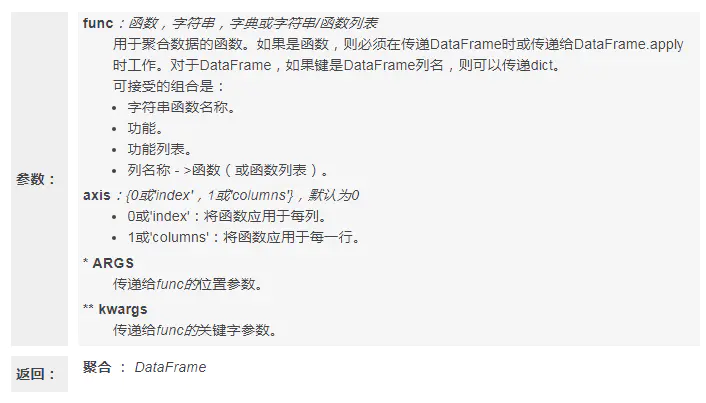

In [23]:
df[['salary', 'score']].agg([np.sum, np.mean, np.median, np.min, np.max, np.std, np.var])

,salary,score
sum,3.331000e+06,1335.000000
mean,3.172381e+04,12.714286
median,3.000000e+04,5.000000
amin,3.500000e+03,0.000000
amax,6.000000e+04,233.000000
std,9.858367e+03,30.953972
var,9.718741e+07,958.148352


### 119. 对salary求平均，对score列求和

In [24]:
#方法一：
salary_mean = df['salary'].mean()
score_sum = df['score'].sum()
salary_mean, score_sum
#方法二：数据透视表
df.agg({'salary' : np.sum, 'score' : np.mean})

salary    3.331000e+06
score     1.271429e+01
dtype: float64

### 120. 计算并提取平均薪资最高的区

In [25]:
#方法一：
df.groupby('district')['salary'].mean().sort_values(ascending=False).index[0]
#方法二：
df[['district', 'salary']].groupby(by='district').mean().sort_values('salary', ascending=False).head(1)

,salary
district,
萧山区,36250.0
